<a href="https://colab.research.google.com/github/VaishnaviNimmala/Mainflow_task_2/blob/main/Task_2(Mainflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project 1 — General EDA on Global_Superstore2.csv**

Shape: (19476, 24)
             Row ID  Postal Code         Sales      Quantity      Discount  \
count  19476.000000      19476.0  19476.000000  19476.000000  19476.000000   
mean   21446.389197      55369.0    198.515394      3.550883      0.080761   
std    14289.382700          0.0    164.156039      2.004367      0.141418   
min        2.000000      55369.0     13.578600      1.000000      0.000000   
25%    10367.750000      55369.0     83.070000      2.000000      0.000000   
50%    19341.500000      55369.0    144.096000      3.000000      0.000000   
75%    28683.250000      55369.0    262.140000      5.000000      0.100000   
max    51289.000000      55369.0    935.760000      9.000000      0.500000   

             Profit  Shipping Cost  
count  19476.000000   19476.000000  
mean      29.369402      20.811343  
std       45.071390      17.625731  
min     -100.368000       5.010000  
25%        4.855500       8.320000  
50%       21.477900      14.210000  
75%       49.985000

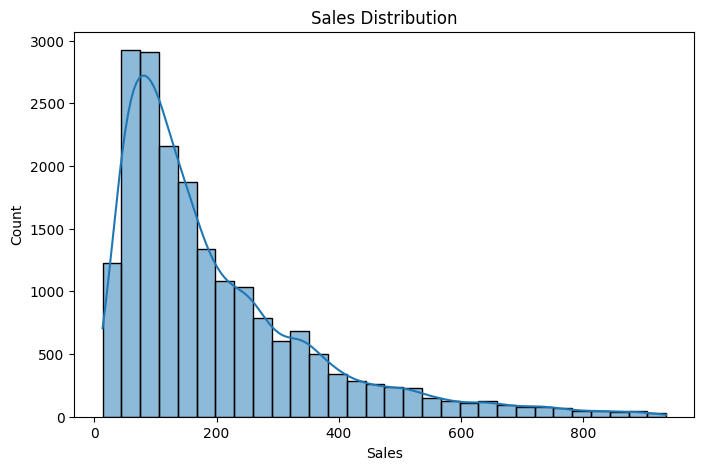

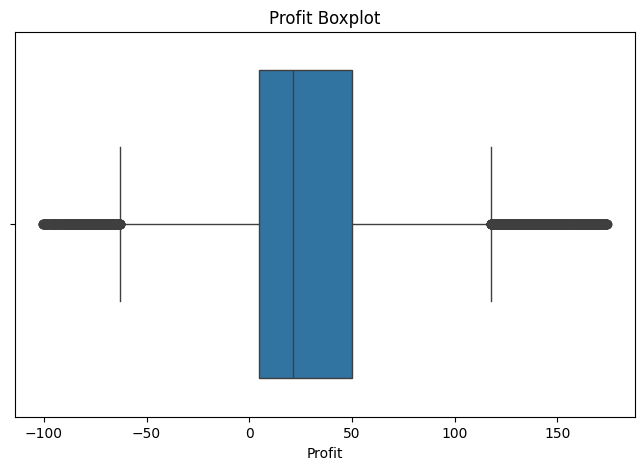

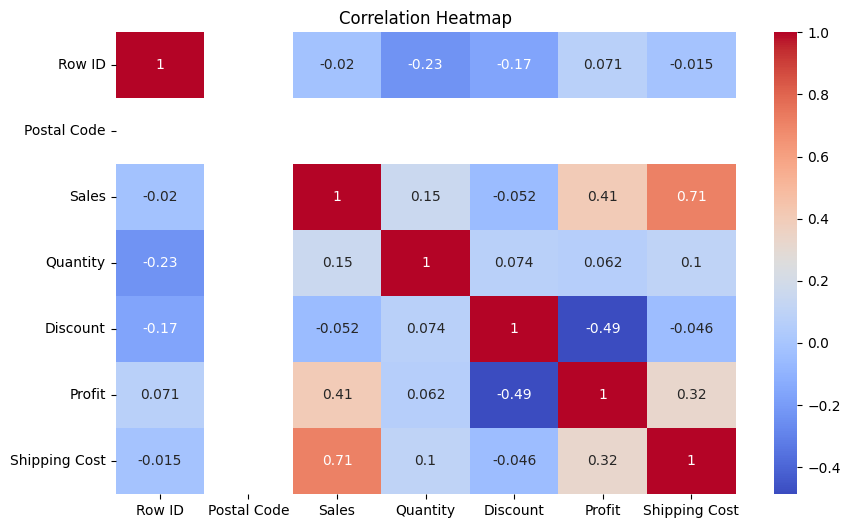

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 🧹 Load and Clean Data
df = pd.read_csv("Global_Superstore2.csv", encoding='latin1')
df = df.drop_duplicates()
df.fillna(df.median(numeric_only=True), inplace=True)

# 📏 Remove Outliers (IQR)
Q1 = df.select_dtypes(include=[np.number]).quantile(0.25)
Q3 = df.select_dtypes(include=[np.number]).quantile(0.75)
IQR = Q3 - Q1
df_cleaned = df[~((df.select_dtypes(include=[np.number]) < (Q1 - 1.5 * IQR)) |
                  (df.select_dtypes(include=[np.number]) > (Q3 + 1.5 * IQR))).any(axis=1)]

# 📊 Statistics
print("Shape:", df_cleaned.shape)
print(df_cleaned.describe())

# 📈 Visualizations
plt.figure(figsize=(8, 5))
sns.histplot(df_cleaned["Sales"], bins=30, kde=True)
plt.title("Sales Distribution")
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned["Profit"])
plt.title("Profit Boxplot")
plt.show()

plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


**Project 2 — Sales Performance Analysis on sales_data_sample.**

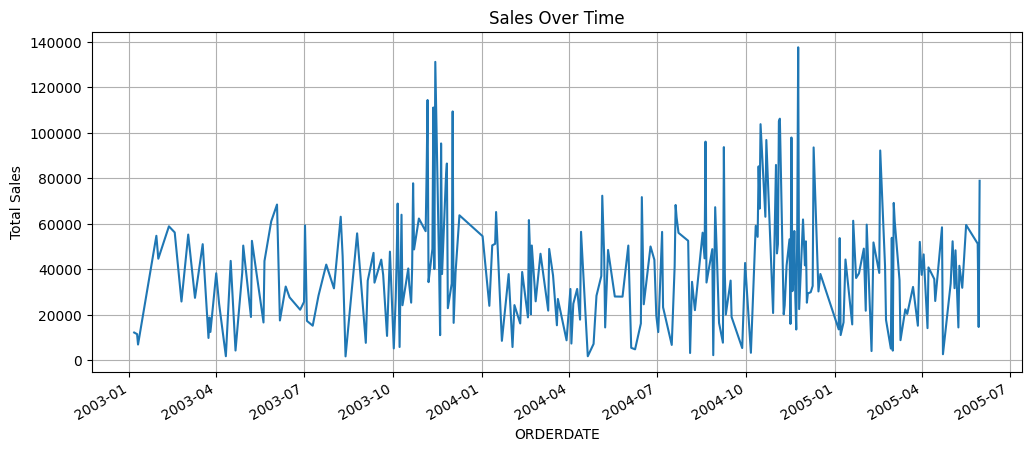

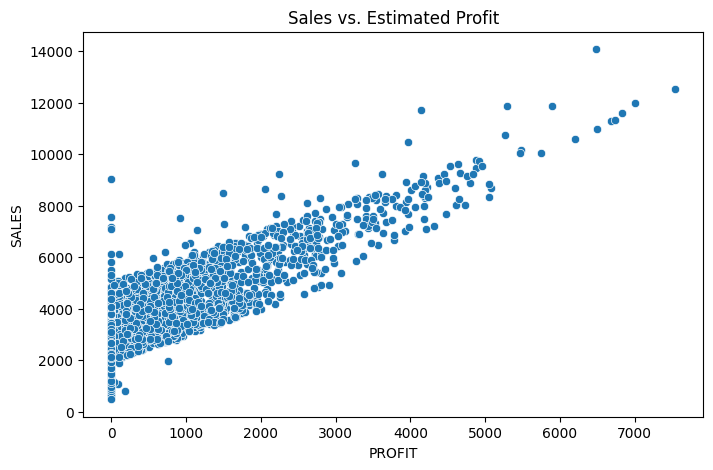

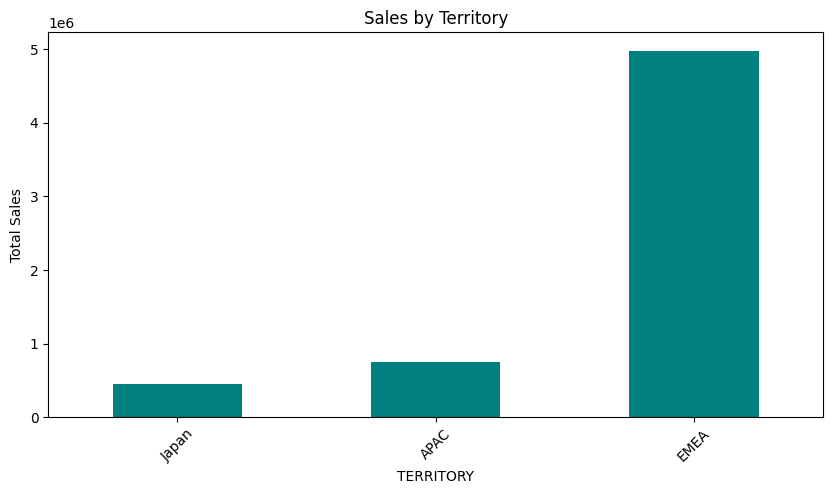

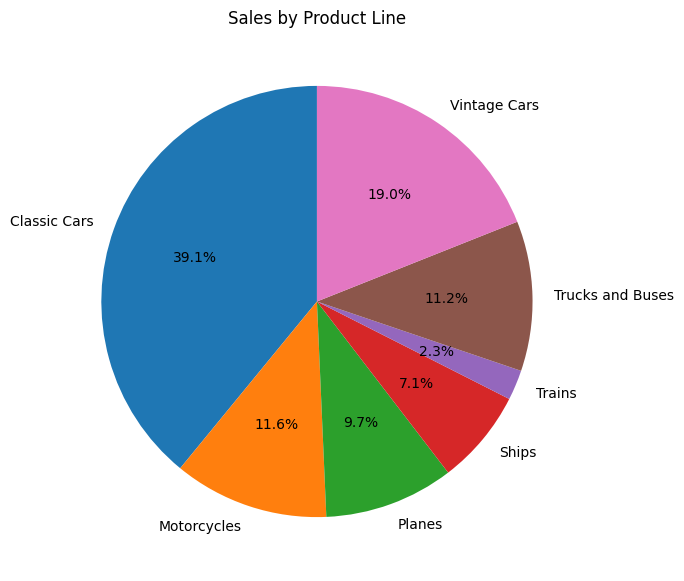

Linear Regression R² Score: 0.78


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# 📂 Load Dataset
df2 = pd.read_csv("sales_data_sample.csv", encoding='latin1')

# 🧹 Data Cleaning
df2 = df2.drop_duplicates()
df2.fillna(df2.median(numeric_only=True), inplace=True)
df2['ORDERDATE'] = pd.to_datetime(df2['ORDERDATE'], errors='coerce')
df2 = df2.dropna(subset=['ORDERDATE'])

# 📊 Visualizations
# Time Series of Sales
plt.figure(figsize=(12, 5))
df2.groupby('ORDERDATE')['SALES'].sum().plot()
plt.title("Sales Over Time")
plt.ylabel("Total Sales")
plt.grid()
plt.show()

# Scatter plot: Profit vs Sales (Using PRICEEACH * QUANTITYORDERED as pseudo-profit)
df2['PROFIT'] = df2['SALES'] - (df2['PRICEEACH'] * df2['QUANTITYORDERED'])
plt.figure(figsize=(8, 5))
sns.scatterplot(x='PROFIT', y='SALES', data=df2)
plt.title("Sales vs. Estimated Profit")
plt.show()

# Sales by Region (TERRITORY)
plt.figure(figsize=(10, 5))
df2.groupby('TERRITORY')['SALES'].sum().sort_values().plot(kind='bar', color='teal')
plt.title("Sales by Territory")
plt.ylabel("Total Sales")
plt.xticks(rotation=45)
plt.show()
# Sales by Product Line
plt.figure(figsize=(7, 7))
df2.groupby('PRODUCTLINE')['SALES'].sum().plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title("Sales by Product Line")
plt.ylabel("")
plt.show()

# 🤖 Predictive Modeling: Predicting SALES using PROFIT
X = df2[['PROFIT']]
y = df2['SALES']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
print("Linear Regression R² Score:", round(model.score(X_test, y_test), 2))